# Data Visualization Problem Set

<span style="color:red">0 / 0 points</span>.

In this problem set, you will be making different plots from the same `housing` dataset you used in the Data Visualization chapter. For all of the questions where  ask you to generate a plot, there will be a list of 'requirements' that your plot must include, so please pay attention to the description of the plot. 

This problem set also requires you to perform very specific subsets and grouped tables of the `housing` dataframe. Thus, you will need to do a fair amount of recalling from pandas chapters one and two: Mainly subsetting by multiple string values, grouping with `groupby()`, choosing value columns with `aggregate()`, etc... 

After every question in the problem set, please remember to create a new code cell for your answer/code. 

In [1]:
# This code cell will be in every one of our chapters in Jupyter Notebook
# The function allows you to see every line of output when the code has multiple lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# load packages
import pandas as pd
import matplotlib.pyplot as plt

## Programming 

1. Read in the `housing.csv` dataset that you used in the Data Visualization chapter, and name the object `housing`. 

In [2]:
housing = pd.read_csv('../../problem_sets/control_structures/housing.csv')

housing.head()

,NAME,CITY,STATE,YEAR,TOT_UNITS,MED_VALUE,MED_RENT,OCCUP_OCCUP,VACANT,BUILT_2020,BUILT_2010,BUILT_2000,BUILT_1990,BUILT_1980,BUILT_1970,BUILT_1960,BUILT_1950,BUILT_1940,BUILT_1939
0,"Birmingham city, Alabama",Birmingham city,Alabama,2010,108537,44824.0,38684.0,87228,21309,3691.0,3872.0,5443.0,11517.0,18783.0,14725.0,20893.0,12188.0,17425.0,108537.0
1,"Dothan city, Alabama",Dothan city,Alabama,2010,29249,15142.0,9931.0,25840,3409,2162.0,1683.0,4288.0,3723.0,7928.0,3377.0,3040.0,1958.0,1090.0,29249.0
2,"Hoover city, Alabama",Hoover city,Alabama,2010,34160,20130.0,9865.0,30280,3880,2963.0,3438.0,10126.0,6253.0,5766.0,3464.0,1808.0,128.0,214.0,34160.0
3,"Huntsville city, Alabama",Huntsville city,Alabama,2010,86495,46809.0,25681.0,74841,11654,7217.0,5689.0,8984.0,14795.0,13529.0,21424.0,8446.0,3231.0,3180.0,86495.0
4,"Mobile city, Alabama",Mobile city,Alabama,2010,89745,44130.0,28381.0,75328,14417,3124.0,2513.0,6998.0,10574.0,22379.0,14470.0,15797.0,6022.0,7868.0,89745.0


2. Assign a new dataframe named `df` that takes the following data from the `housing` dataframe:
   - Subset `housing` for just two states: 'Georgia' and 'Michigan'.
   - From that subset, group the data by state.
   - From that grouping, aggregate all of the `BUILT_0000` variables, from `BUILT_2020` to `BUILT_1939`. The aggregate function should be 'sum'.
You should make this dataframe in a single line of code.
3. In the same code cell, display `df` and display a [transposed](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html) `df`.

In [3]:
df = housing[housing['STATE'].str.contains('Georgia|Michigan')].groupby('STATE').aggregate({
    'BUILT_2020':'sum', 'BUILT_2010':'sum', 'BUILT_2000':'sum', 
    'BUILT_1990':'sum', 'BUILT_1980':'sum', 'BUILT_1970':'sum', 
    'BUILT_1960':'sum', 'BUILT_1950':'sum', 'BUILT_1940':'sum', 'BUILT_1939':'sum'})
df
df.T # or df.transpose()

,BUILT_2020,BUILT_2010,BUILT_2000,BUILT_1990,BUILT_1980,BUILT_1970,BUILT_1960,BUILT_1950,BUILT_1940,BUILT_1939
STATE,,,,,,,,,,
Georgia,337180.0,865215.0,1487354.0,1346711.0,1369515.0,1249416.0,1075983.0,762145.0,567948.0,4109893.0
Michigan,89405.0,297823.0,608209.0,835889.0,1218200.0,1628337.0,2034694.0,2088908.0,1962357.0,6609530.0


STATE,Georgia,Michigan
BUILT_2020,337180.0,89405.0
BUILT_2010,865215.0,297823.0
BUILT_2000,1487354.0,608209.0
BUILT_1990,1346711.0,835889.0
BUILT_1980,1369515.0,1218200.0
BUILT_1970,1249416.0,1628337.0
BUILT_1960,1075983.0,2034694.0
BUILT_1950,762145.0,2088908.0
BUILT_1940,567948.0,1962357.0
BUILT_1939,4109893.0,6609530.0


4. Create a bar plot from the transposed `df`. Make sure that the plot has the following features:
   - The legend _only_ shows the names of the two states. In other words, without the variable name `STATE` in the legend.
   - Change the Y-axis numeric notation from scientific to plain
   - Add a title describing this plot.
   - Rotate the x-axis text 45 degrees clockwise.
   - Label both y and x axes.
   - Change the values of the x-axis ticks to just the decades (i.e.: 2020, 2010, 2000...)
   - Extra 0.5 point: specify `color=('crimson','navy')`. We did not teach this argument in the chapter. Find the right place for this line such that the bars for Georgia are crimson, and the bars for Michigan are navy.

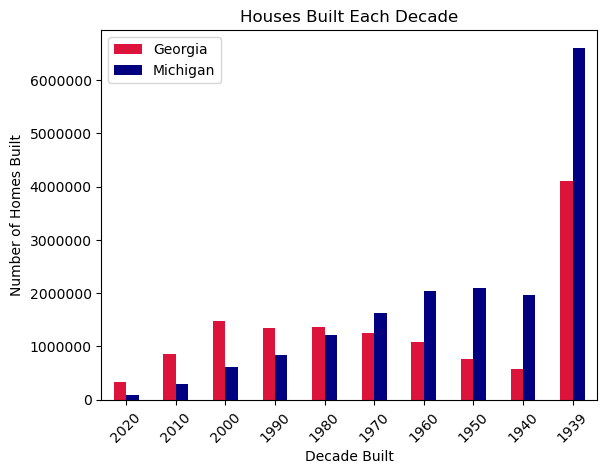

In [4]:
df.T.plot(kind='bar', color=('crimson','navy'), rot=45)
plt.legend(['Georgia', 'Michigan'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Houses Built Each Decade')
plt.ylabel('Number of Homes Built')
plt.xlabel('Decade Built')
plt.xticks([9,8,7,6,5,4,3,2,1,0],['1939', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']);

5. The previous plot's dates on the x-axis are in reverse order. Fix them so the values go in chronological order from left to right. _Hint: It'll be easier to reverse the decade order in the dataframe than with pyplot._

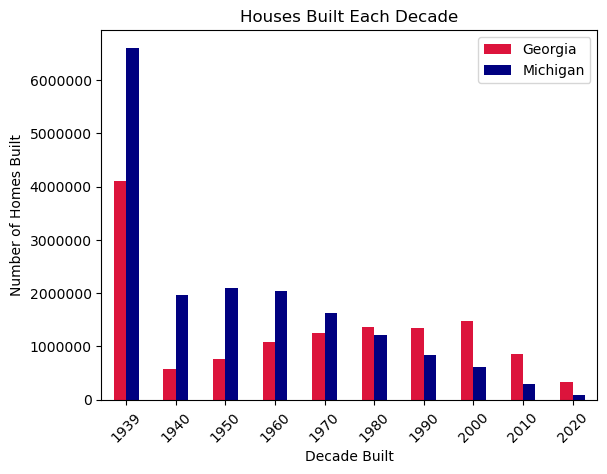

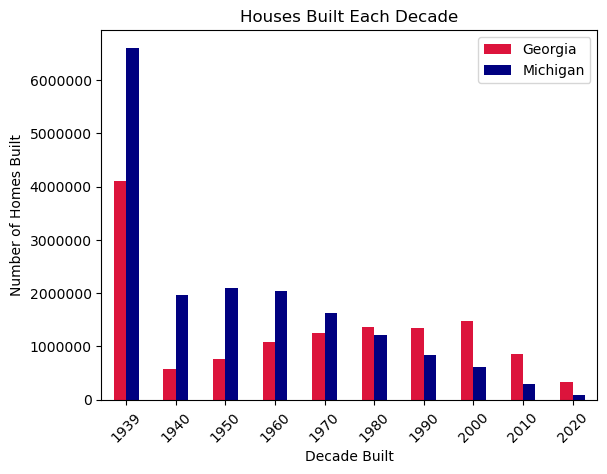

In [5]:
# There are two possible answers: with reset_index.sort_values()

df.T.reset_index().sort_values(by='index').plot(kind='bar', color=('crimson','navy'), rot=45)
plt.legend(['Georgia', 'Michigan'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Houses Built Each Decade')
plt.ylabel('Number of Homes Built')
plt.xlabel('Decade Built')
plt.xticks([0,1,2,3,4,5,6,7,8,9],['1939', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020'])

# or using iloc[:,::-1]. Students will likely remember this function 
df.iloc[:,::-1].T.plot(kind='bar', color=('crimson','navy'), rot=45)
plt.legend(['Georgia', 'Michigan'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Houses Built Each Decade')
plt.ylabel('Number of Homes Built')
plt.xlabel('Decade Built')
plt.xticks([0,1,2,3,4,5,6,7,8,9],['1939', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']);

6. Make another bar plot on a grouped table for the ten states with the lowest average values of 'median rent'. This time you do not need to assign a new object. In one line create a new data table that has the following characteristics:
   - The value of `YEAR` is greater than 2015.
   - Grouped by the variable `STATE`.
   - The aggregate function takes the mean of `MED_RENT`.
   - Sort the values in ascending order, and pick the first ten observations.

    In the very same line of code, attach the `.plot()` function to make a bar chart. Then add the following features to the plot:
   - The bars should be green.
   - Add a title that says 'Ten Lowest Median Rents in the USA - 2016-2022 Average'.
   - Remove the legend entirely.
   - Label the y-axis 'Rent in dollars'. Remove the x-axis label.

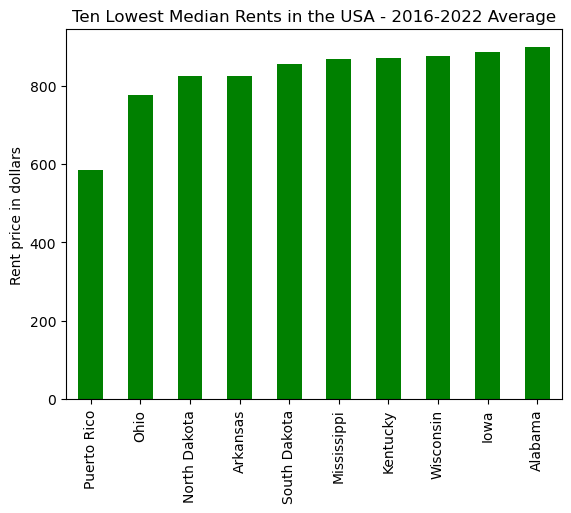

In [6]:
housing[housing['YEAR']>2015].groupby(['STATE']).aggregate({'MED_RENT':'mean'}).sort_values(by='MED_RENT').head(10).plot(kind='bar', color='green')
plt.title('Ten Lowest Median Rents in the USA - 2016-2022 Average')
plt.legend('', frameon=False)
plt.ylabel('Rent price in dollars')
plt.xlabel('');

7. Visualize the trends for median home value `MED_VALUE` from 2015 to 2022 in Arkansas, Ohio, Puerto Rico, North Dakota, and South Dakota. To do this, create a new `df2` dataframe object that takes the following data from `housing`:
   - Filters for values of `STATE` containing the five states mentioned, __and__ `YEAR` is greater than 2014.
   - Group the subset by `YEAR` and `STATE`.
   - Aggregate the mean value of `MED_VALUE`.
  
    This should be in a single line of code. _Do not forget to unstack the table._

    Make a line plot from `df2` that has the following visual features:
   - Add a descriptive title to this plot.
   - The legend box should contain only state names.
   - Label the y-axis 'Median home value in dollars'. Remove the x-axis label.
   - Make the line style dotted, and the line width 5.
   - Use the 'Accent' colormap.
   - Annotate the plot with an arrow pointing at the top of the 'Iowa' line where it intersects with the year '2020'. Write 'No data collected 2020'.

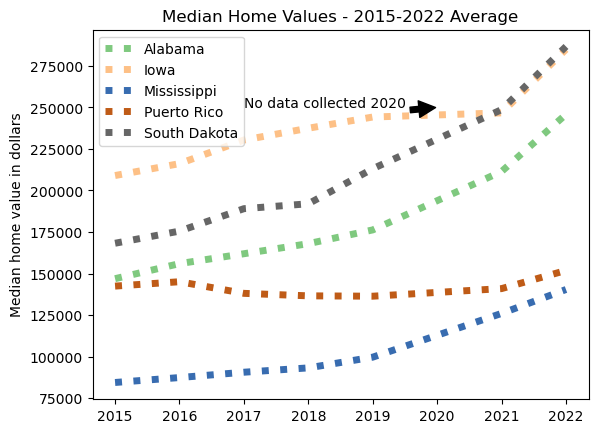

In [7]:
df2 = housing[(housing['STATE'].str.contains('Puerto Rico|Ohio|North Dakota|Arkansas|South Dakota')) & (housing['YEAR']>2014)].groupby(
    ['YEAR', 'STATE']).aggregate({'MED_VALUE':'mean'}).unstack()

df2.plot(linestyle=':', cmap='Accent', linewidth=5)
plt.title('Median Home Values - 2015-2022 Average')
plt.legend(['Alabama', 'Iowa', 'Mississippi', 'Puerto Rico', 'South Dakota'])
plt.ylabel('Median home value in dollars')
plt.xlabel('')
plt.annotate('No data collected 2020', xy=(2020,250000), xytext=(2017,250000), arrowprops=dict(facecolor='black', shrink=0.05));

8. Create a scatter plots to investigate the relationship between total housing units `TOT_UNITS` available and the number of vacant units `VACANT`. Subset the `housing` dataframe for 2022 an plot a scatterplot with the following parameters:
    - `TOT_UNITS` should be $x$, and `VACANT` should be $y$
    - Title your plot 'Total Housing Units and Vacant Units- 2022'
    - Scale the plot axes to zoom in past the outlier points. Use the following coordinates: -100000,200000 on the x-axis; -10000, 200000 on the y-axis.
    - Change the x-axis values from scientific to plain, and rotate them 45 degrees.
    - Make the dot colors red with an transparency of 50%.
    - Label your x and y-axis 'Total housing units' and 'Total vacant units'. 
    
9. In the same cell, repeat the plot but for the year 2010. Change the title accordingly, and change the dot color to blue.

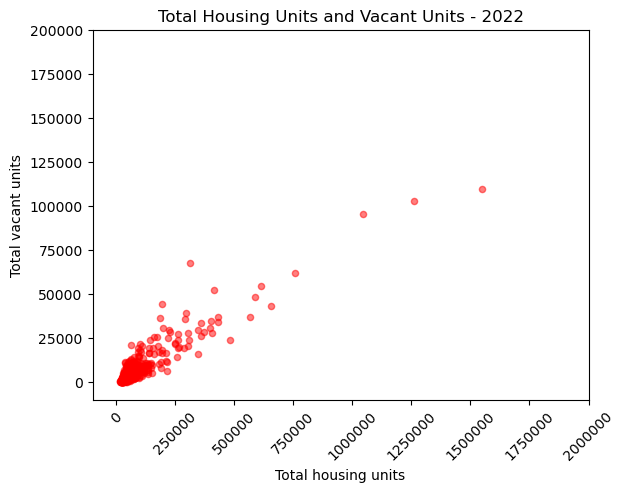

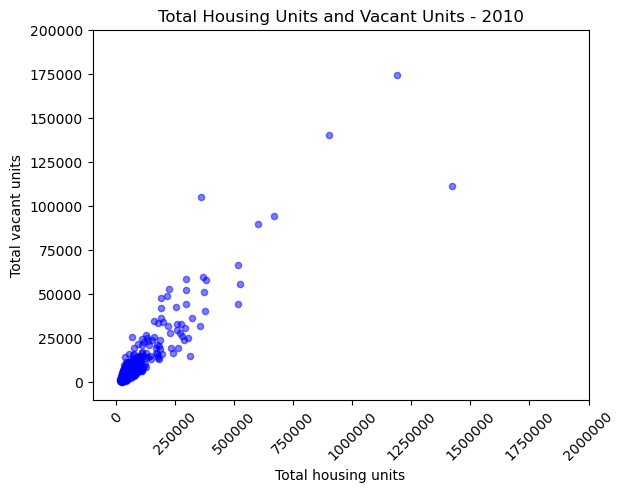

In [8]:
housing[housing['YEAR']==2022].plot(kind='scatter', x='TOT_UNITS', y='VACANT', color='red', alpha=0.5, rot=45)
plt.title('Total Housing Units and Vacant Units - 2022')
plt.xlim(-100000,2000000)
plt.ylim(-10000,200000)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Total housing units')
plt.ylabel('Total vacant units')

housing[housing['YEAR']==2010].plot(kind='scatter', x='TOT_UNITS', y='VACANT', color='blue', alpha=0.5, rot=45)
plt.title('Total Housing Units and Vacant Units - 2010')
plt.xlim(-100000,2000000)
plt.ylim(-10000,200000)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Total housing units')
plt.ylabel('Total vacant units');

10. Create a custom function named `custom_mv_line_plot` that re-creates the plot from question seven. The function should make the same plot as question seven, with the same parameters but the user can provide different states and starting years. The function should have three arguments:
    - An argument for the `housing` data, named `data`
    - An argument for the list of states the user can provide to the function, named `states`
    - An argument for the year that the user wishes to start tracking median home values, names `starting`

    The function should subset `data` by the `states` and `starting` year. _Hint:_ look for a lesson on joining strings in a previous chapter if you get stuck on what to place in `.str.contains()`

    Do not annotate the plot for the year when no data was collected. In the end, you should call `custom_mv_line_plot` twice with the following two sets of arguments:
    - custom_mv_line_plot(data=housing, states=['California', 'Arizona', 'Washington'], starting=2014)
    - custom_mv_line_plot(data=housing, states=['Wyoming', 'Hawaii', 'Florida', 'Vermont', 'Idaho'], starting=2010)

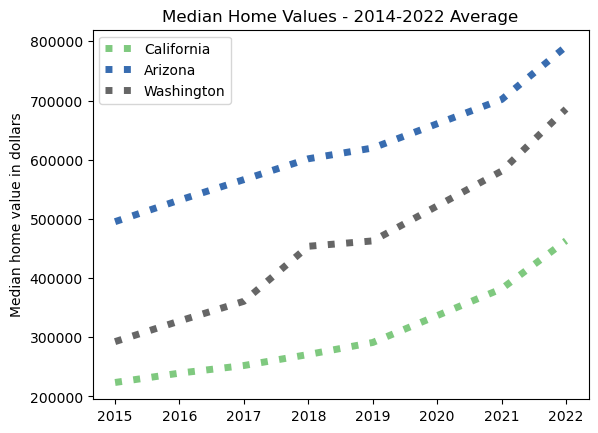

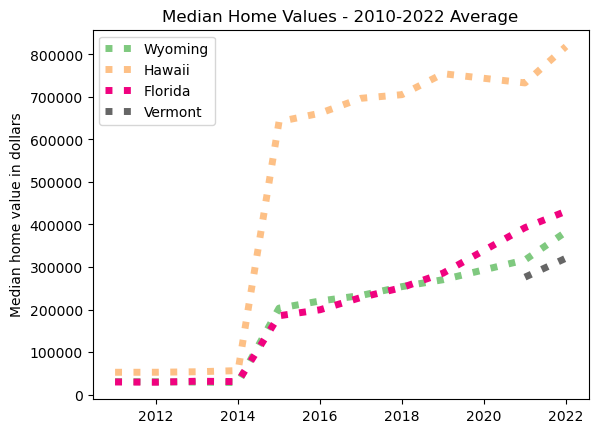

In [9]:
def custom_mv_line_plot(data, states, starting):
    sep='|'
    df = data[(data['STATE'].str.contains(sep.join(states))) & (data['YEAR']>starting)].groupby(
    ['YEAR', 'STATE']).aggregate({'MED_VALUE':'mean'}).unstack()
    df.plot(linestyle=':', cmap='Accent', linewidth=5)
    plt.title(f'Median Home Values - {starting}-2022 Average')
    plt.legend(states)
    plt.ylabel('Median home value in dollars')
    plt.xlabel('');

states=['California', 'Arizona', 'Washington']
data=housing
starting=2014
custom_mv_line_plot(data, states, starting)

states=['Wyoming', 'Hawaii', 'Florida', 'Vermont', 'Idaho']
starting=2010
custom_mv_line_plot(data, states, starting)

## Interpretation Questions

11. In question four, the plot show values for `BUILT_1939` far exceeding any other decade. In your own words explain why that is. 

BUILT_1939 actually refers to homes built at any point before 1939, not just a decade.

12. Explain why the dots in the scatterplots from question 9 cluster so densely towards the left, and why there are so few observations in the right side of the chart? What does this mean, regarding the density of observations, the number of housing units, and what each dot actually represents?

There are far far more bottom-left observations because there are far more small towns than there are large cities with more than 25000 homes or some such number. 

13. It appears that there is a close relationship between total housing units and vacant units, such that the cluster of observations is in a relatively dense diagonal line pointing up and to the right. How do you interpret this relationship, in your own words? Is there an obvious explanation?

There is an obvious proportional relationship between how many houses there are and how many of them are vacant. More houses means more vacant houses. 

## Debugging

14. The code below has bugs in the code that keep it from rendering a box plot. Make a new code cell and fix the code so the plot displays correctly.

In [10]:
housing[housing['STATE'].str.contains('Puerto Rico|Ohio|North Dakota|Arkansas|South Dakota')].plot(kind='box', column='tot_units', by='state')

KeyError: "None of [Index(['tot_units', 'state'], dtype='object')] are in the [columns]"

TOT_UNITS    Axes(0.125,0.11;0.775x0.77)
dtype: object

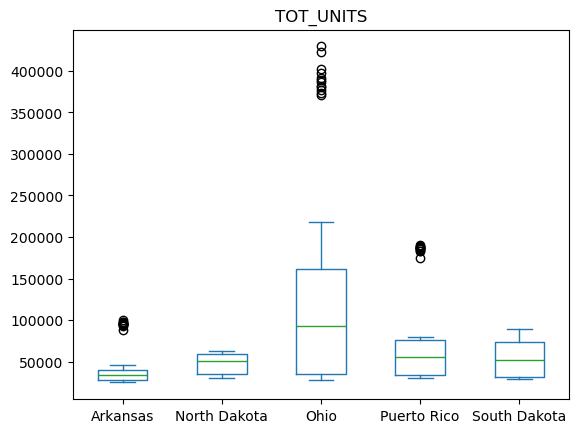

In [11]:
housing[housing['STATE'].str.contains('Puerto Rico|Ohio|North Dakota|Arkansas|South Dakota')].plot(kind='box', column='TOT_UNITS', by='STATE')

15. The code below should display a scatterplot of median home values by median rent for the year 2022. There are several bugs in the code that you must fix in a new code cell. 

In [12]:
housing[housing['YEAR']=2022].plot(kind='scater', x='MED_VALUE', y='MED_RENT', color='red', alpha=0.0, rot=45)
plt.title('Median Housing Value by Median Rent - 2022')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Median House Value')
plt.ylabel('Median Rent');

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (2440738684.py, line 1)

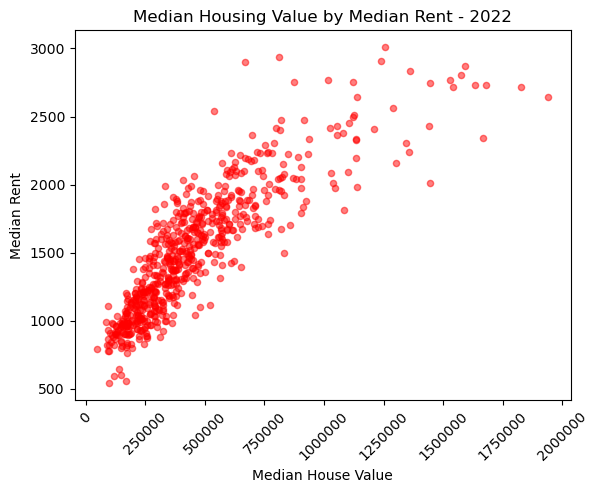

In [13]:
housing[housing['YEAR']==2022].plot(kind='scatter', x='MED_VALUE', y='MED_RENT', 
                                    color='red', alpha=0.5, rot=45)
plt.title('Median Housing Value by Median Rent - 2022')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Median House Value')
plt.ylabel('Median Rent')
plt.show();